## **Nama: Nadia Hartini Kusumawijaya**



## Import Modules

In [ ]:
! pip install matplotlib
! pip install seaborn

In [ ]:
# Dataframe Libraries
import pandas as pd

# Array Libraries
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Math libraries
import math

## Dataset

In [ ]:
#Membaca dataset untuk Google Colab
df = pd.read_csv('linkdin_Job_data.csv')
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,"1,001-5,000 employees · IT Services and IT Con...",184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,"1,001-5,000 employees · IT Services and IT Con...",200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10 employees,200,7 hours,NaN,Vartika Singh,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10 employees,8,26 minutes,1 company alumni,Manisha (Gisele Smith),NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN


In [ ]:
#Melihat deskripsi singkat dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7927 entries, 0 to 7926
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              7927 non-null   int64  
 1   job                 7894 non-null   object 
 2   location            7894 non-null   object 
 3   company_id          0 non-null      float64
 4   company_name        7892 non-null   object 
 5   work_type           7736 non-null   object 
 6   full_time_remote    7848 non-null   object 
 7   no_of_employ        7603 non-null   object 
 8   no_of_application   7887 non-null   object 
 9   posted_day_ago      7920 non-null   object 
 10  alumni              4858 non-null   object 
 11  Hiring_person       5720 non-null   object 
 12  linkedin_followers  4814 non-null   object 
 13  hiring_person_link  5720 non-null   object 
 14  job_details         7881 non-null   object 
 15  Column1             0 non-null      float64
dtypes: flo

## **Soal 1**

**Missing Values**

Pertanyaan: Identifikasi kolom yang memiliki nilai yang hilang dan hitung persentase data yang hilang di setiap kolom.

In [ ]:
missing_values = df.isnull().sum().reset_index() #Mencari jumlah nilai hilang dan mereset index supaya pembuatan tabel lebih bagus
missing_values.columns = ["Column Name", "Missing Values"] #Mengubah nama judul kolom supaya lebih jelas
missing_values["Percentage of Missing Values"] = round((missing_values["Missing Values"]/len(df))*100, 3) #Mencari presentase nilai hilang dari seluruh data dan membulatkannya ke 3 angka dibelakang koma
missing_values["Percentage of Missing Values"] = missing_values["Percentage of Missing Values"].astype(str)+"%" #Mengubah tipe data untuk persentase menjadi string supaya dapat diberi tanda persen "%"
missing_values#Menampilkan tabel

,Column Name,Missing Values,Percentage of Missing Values
0,job_ID,0,0.0%
1,job,33,0.416%
2,location,33,0.416%
3,company_id,7927,100.0%
4,company_name,35,0.442%
5,work_type,191,2.409%
6,full_time_remote,79,0.997%
7,no_of_employ,324,4.087%
8,no_of_application,40,0.505%
9,posted_day_ago,7,0.088%


**Jika kolom diurutkan berdasarkan nilai kolom dengan missing values terbesar ke terkecil dan tidak memperhatikan index awal**

In [ ]:
sorted_missing_values = missing_values.sort_values(by="Missing Values", ascending=False, ignore_index=True)

sorted_missing_values

,Column Name,Missing Values,Percentage of Missing Values
0,company_id,7927,100.0%
1,Column1,7927,100.0%
2,linkedin_followers,3113,39.271%
3,alumni,3069,38.716%
4,Hiring_person,2207,27.842%
5,hiring_person_link,2207,27.842%
6,no_of_employ,324,4.087%
7,work_type,191,2.409%
8,full_time_remote,79,0.997%
9,job_details,46,0.58%


## **Soal 2**

**Data Type Correction**

Pertanyaan: Kolom `no_of_employ` memiliki data numerik yang disimpan sebagai string. Ubah kolom ini menjadi tipe integer dan tangani nilai non-numerik dengan tepat.
Note : Kamu perlu membuat kolom baru minimal employ dan maksimal employ, jika datanya tidak berbentuk range maka masuk ke kolom maksimal employ


In [ ]:
#Melihat nilai unik dari kolom no_of_employ untuk mencari cara untuk mengambil nilai angka yang diinginkan
df["no_of_employ"].unique()

array(['1,001-5,000 employees · IT Services and IT Consulting',
       '1-10 employees', '10,001+ employees · Telecommunications',
       '51-200 employees', '201-500 employees', nan, '11-50 employees',
       '501-1,000 employees · Renewable Energy Semiconductor Manufacturing',
       '501-1,000 employees · Market Research', '1,001-5,000 employees',
       '5,001-10,000 employees · IT Services and IT Consulting',
       '10,001+ employees · IT Services and IT Consulting',
       '51-200 employees · IT Services and IT Consulting',
       '51-200 employees · Technology, Information and Internet',
       '501-1,000 employees',
       '1,001-5,000 employees · Pharmaceutical Manufacturing',
       '10,001+ employees · Information Technology & Services',
       '11-50 employees · Human Resources Services',
       '1-10 employees · Staffing and Recruiting',
       '11-50 employees · IT Services and IT Consulting',
       '501-1,000 employees · Business Consulting and Services',
       '201-5

- Karena kolom no_of_employ mengandung informasi Jumlah karyawan di perusahaan yang menawarkan pekerjaan, maka informasi selain itu (informasi sektor bisnis) akan dihapus dari kolom 'no_of_employ'.
- Informasi sektor bisnis disimpan di kolom baru dengan nama 'business_sector_of_employ'. (karena untuk jaga - jaga apabila informasi ini dibutuhkan atau tidak di masa depan)

In [ ]:
#1. Karena nilai angka ditulis di depan sebelum spasi pertama, maka menggunakan split dan diambil yang posisi pertama,
#2. Karena ingin menghilangkan koma di nilai angka maka diubah ke string dulu dan menggunakan replace
df["no_of_employ"] = df["no_of_employ"].apply(lambda x: str(x).split()[0].replace(",", ""))
df["no_of_employ"]

,no_of_employ
0,1001-5000
1,1001-5000
2,1001-5000
3,1-10
4,1-10
...,...
7922,5001-10000
7923,1001-5000
7924,10001+
7925,1001-5000


In [ ]:
#1. Karena sektor bisnis ditulis selalu diakhir, maka menggunakan split berdasarkan tanda titik (.) dan mengambil informasi yang paling belakang,
#2. Karena terdapat beberapa entri data yang tidak memiliki informasi sektor bisnis (contoh: "1-10 employees"), maka diganti dengan null value karena sebenarnya informasinya tidak ada
df["business_sector_of_employ"] = df["no_of_employ"].apply(lambda x: str(x).split('·')[-1].strip())
df["business_sector_of_employ"] = df["business_sector_of_employ"].where(~df["business_sector_of_employ"].str.contains("employees", na=False), np.nan)
df["business_sector_of_employ"]

,business_sector_of_employ
0,IT Services and IT Consulting
1,IT Services and IT Consulting
2,IT Services and IT Consulting
3,NaN
4,NaN
...,...
7922,IT Services and IT Consulting
7923,IT Services and IT Consulting
7924,IT Services and IT Consulting
7925,IT Services and IT Consulting


**Membuat kolom baru minimal employ dan maksimal employ dengan tipe data integer**

In [ ]:
#1. Karena nilai minimal employ ditulis sebelum tanda minus ("-"), maka menggunakan split berdasarkan tanda minus ("-") dan mengambil informasi yang awal jika ada "-" di data,
#2. Jika tidak mengandung "-" maka entri data adalah null value alias NaN
#3. Karena ada data yang memiliki nilai null (missing values) maka memakai errors="coerce"
df["minimal employ"] = df["no_of_employ"].apply(lambda x: x.split("-")[0] if "-" in x else np.nan)
df["minimal employ"] = pd.to_numeric(df["minimal employ"],errors = "coerce")
df["minimal employ"]

,minimal employ
0,1001.0
1,1001.0
2,1001.0
3,1.0
4,1.0
...,...
7922,5001.0
7923,1001.0
7924,NaN
7925,1001.0


In [ ]:
#1. Karena nilai maksimal employ ditulis setelah tanda minus ("-"), maka menggunakan split berdasarkan tanda minus ("-") dan mengambil informasi yang setelah "-" jika ada "-" di data,
#2. Karena ada data yang memiliki nilai + (contoh: 10,001+), maka mengambil nilai sebelum tanda + sebagai nilai maksimum (mengambil nilai tersebut dan tanda + dihilangkan)
#3. Karena ada data yang memiliki nilai null (missing values) maka memakai errors="ignore"
df["maksimal employ"] = df["no_of_employ"].apply(lambda x: x.split("-")[1] if "-" in x else x.replace("+",""))
df["maksimal employ"] = pd.to_numeric(df["maksimal employ"],errors = "coerce")
df["maksimal employ"]

,maksimal employ
0,5000.0
1,5000.0
2,5000.0
3,10.0
4,10.0
...,...
7922,10000.0
7923,5000.0
7924,10001.0
7925,5000.0


**Hasil Akhir**

In [ ]:
df[["no_of_employ","business_sector_of_employ","minimal employ","maksimal employ"]]

,no_of_employ,business_sector_of_employ,minimal employ,maksimal employ
0,1001-5000,IT Services and IT Consulting,1001.0,5000.0
1,1001-5000,IT Services and IT Consulting,1001.0,5000.0
2,1001-5000,IT Services and IT Consulting,1001.0,5000.0
3,1-10,NaN,1.0,10.0
4,1-10,NaN,1.0,10.0
...,...,...,...,...
7922,5001-10000,IT Services and IT Consulting,5001.0,10000.0
7923,1001-5000,IT Services and IT Consulting,1001.0,5000.0
7924,10001+,IT Services and IT Consulting,NaN,10001.0
7925,1001-5000,IT Services and IT Consulting,1001.0,5000.0


## **Soal 3**

**Duplicate Data Detection and Removal**

Pertanyaan: Deteksi dan hapus posting pekerjaan yang duplikat berdasarkan `job_ID` Pastikan dataset yang dihasilkan hanya berisi posting pekerjaan yang unik.

In [ ]:
#Mendeteksi nilai duplikat berdasarkan kolom job_ID
jobID_duplicates = df['job_ID'].duplicated(keep=False)
df[jobID_duplicates]

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,alumni,Hiring_person,linkedin_followers,hiring_person_link,job_details,Column1,business_sector_of_employ,minimal employ,maksimal employ
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,1001-5000,200,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,IT Services and IT Consulting,1001.0,5000.0
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,1001-5000,184,8 hours,12 company alumni,NaN,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,IT Services and IT Consulting,1001.0,5000.0
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,1001-5000,200,9 hours,3 company alumni,Shahid Ahmad,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN,IT Services and IT Consulting,1001.0,5000.0
5,3472504479,Data Analyst,"Gurugram, Haryana, India",NaN,airtel,On-site,Full-time · Entry level,10001+,200,10 hours,132 company alumni,NaN,"972,657 followers",NaN,About the job The ideal candidate will use the...,NaN,Telecommunications,NaN,10001.0
6,3471658510,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Bengaluru, Karnataka, India",NaN,Crossover,Remote,Full-time · Associate,1001-5000,200,8 hours,12 company alumni,NaN,"5,395,546 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,IT Services and IT Consulting,1001.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7913,3464523737,Informatica Developer,"Kochi, Kerala, India",NaN,Tata Consultancy Services,On-site,Full-time,10001+,31,3 days,"10,080 company alumni",Angel Mathews,"11,923,625 followers",https://www.linkedin.com/in/angel-mathews-3256...,About the job Greetings from TATA Consultancy ...,NaN,IT Services and IT Consulting,NaN,10001.0
7914,3471321322,Business Support/Partner Alliance Coordinator,"Navi Mumbai, Maharashtra, India",NaN,cloudxchange.io,On-site,Full-time · Associate,51-200,21,3 days,1 company alumni,Annette Roberts,NaN,https://www.linkedin.com/in/annette-roberts,About the job Cloudxchange.io is India’s Leadi...,NaN,IT Services and IT Consulting,51.0,200.0
7915,3468025847,Xceptor Developer,"Chennai, Tamil Nadu, India",NaN,Virtusa,Hybrid,Full-time · Mid-Senior level,10001+,9,3 days,412 company alumni,Nandha Ramadass,"782,441 followers",https://www.linkedin.com/in/nandha-ramadass-43...,About the job 4+ Years of Experience in Xcepto...,NaN,IT Services and IT Consulting,NaN,10001.0
7920,3466165399,LTE Developer,"Hyderabad, Telangana, India",NaN,Tata Consultancy Services,Hybrid,Full-time,10001+,45,1 day,"10,080 company alumni",Madhuri Mahajan,"11,923,632 followers",https://www.linkedin.com/in/madhuri-mahajan-b0...,"About the job Dear Candidate, Greetings from T...",NaN,IT Services and IT Consulting,NaN,10001.0


**Terdapat 3644 nilai duplikat job_ID**

In [ ]:
jobID_duplicates.sum()

3644

**Menghapus posting pekerjaan duplikat berdasarkan 'job_ID', tapi mepertahankan postingan pertama**

In [ ]:
df = df.drop_duplicates(subset= ["job_ID"], keep='first')

## **Soal 4**

**Standarisasi Data**

Pertanyaan: Standarisasi kolom `location` dengan mengambil nama kota, provinsi dan negara serta  memastikan semua nama kota ditulis dengan huruf besar dan konsisten.

In [ ]:
#Menyelidiki nilai unik dari kolom lokasi untuk mencari cara standarisasi
df["location"].unique()

array(['Delhi, Delhi, India', 'New Delhi, Delhi, India',
       'Greater Bengaluru Area', 'Gurugram, Haryana, India',
       'Mohali district, Punjab, India', 'Bengaluru, Karnataka, India',
       'Delhi, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Telangana, India', 'India',
       'Chennai, Tamil Nadu, India', 'Kolkata, West Bengal, India',
       'Madurai, Tamil Nadu, India', 'Pune, Maharashtra, India',
       'Mumbai, Maharashtra, India', 'Kochi, Kerala, India',
       'Visakhapatnam, Andhra Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Vadodara, Gujarat, India',
       'Hosur, Tamil Nadu, India', 'Coimbatore, Tamil Nadu, India',
       'Chengannur, Kerala, India', 'Mumbai Metropolitan Region',
       'Bhopal, Madhya Pradesh, India', 'Maharashtra, India',
       'Surat, Gujarat, India', 'Ludhiana, Punjab, India',
       'Jaipur, Rajasthan, India', 'Chandigarh, Chandigarh, India',
       'Trivandrum, Kerala, India', 'Delhi Cantonment, Delhi, India',
       'Tha

In [ ]:
# 1. Menggunakan split untuk membagi data dan menggunakan expand untuk memasukkan data langsung ke tiga bagian
# 2. Karena urutannya adalah City, Province, State, maka entri data dimasukkan ke kolom masing - masing berdasarkan informasi urutan tersebut
# 3. Jika ada data yang tidak memiliki nilai ketiga-tiganya lengkap (Contoh entri data yang mengandung nilai City saja: 'Greater Bengaluru Area')
#maka kolom yang tidak memiliki nilai dikosongkan nilainya menjadi None
# 4. Menggunakan title() sehingga semua nama kota huruf besar dan konsisten
split_location = df["location"].str.split(",", expand=True)
df.loc[:,"City"] = split_location[0].str.title()
df.loc[:,"Province"] = split_location[1].str.title()
df.loc[:,"State"] = split_location[2].str.title()

In [ ]:
df[["City", "Province", "State"]]

,City,Province,State
0,Delhi,Delhi,India
1,New Delhi,Delhi,India
2,Greater Bengaluru Area,None,None
3,Gurugram,Haryana,India
4,Mohali District,Punjab,India
...,...,...,...
7922,Kochi,Kerala,India
7923,Gurugram,Haryana,India
7924,Hyderabad,Telangana,India
7925,Bengaluru,Karnataka,India


**Melihat dataset secara keseluruhan untuk mengecek**

In [ ]:
df.head()

,job_ID,job,location,company_id,company_name,work_type,full_time_remote,no_of_employ,no_of_application,posted_day_ago,...,linkedin_followers,hiring_person_link,job_details,Column1,business_sector_of_employ,minimal employ,maksimal employ,City,Province,State
0,3471657636,"Data Analyst, Trilogy (Remote) - $60,000/year USD","Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,1001-5000,200,8 hours,...,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,IT Services and IT Consulting,1001.0,5000.0,Delhi,Delhi,India
1,3471669068,"Data Analyst, Trilogy (Remote) - $60,000/year USD","New Delhi, Delhi, India",NaN,Crossover,Remote,Full-time · Associate,1001-5000,184,8 hours,...,"5,395,547 followers",NaN,About the job Crossover is the world's #1 sour...,NaN,IT Services and IT Consulting,1001.0,5000.0,New Delhi,Delhi,India
2,3474349934,Data Analyst - WFH,Greater Bengaluru Area,NaN,Uplers,Remote,Full-time · Mid-Senior level,1001-5000,200,9 hours,...,NaN,https://www.linkedin.com/in/shahid-ahmad-a2613...,About the job Profile: ML EngineersExperience:...,NaN,IT Services and IT Consulting,1001.0,5000.0,Greater Bengaluru Area,None,None
3,3472816027,Data Analyst,"Gurugram, Haryana, India",NaN,PVAR SERVICES,On-site,Full-time,1-10,200,7 hours,...,"2,094 followers",https://www.linkedin.com/in/vartika-singh-,About the job Designation: Data AnalystLocatio...,NaN,NaN,1.0,10.0,Gurugram,Haryana,India
4,3473311511,Data Analyst,"Mohali district, Punjab, India",NaN,Timeline Freight Brokers,On-site,Full-time,1-10,8,26 minutes,...,NaN,https://www.linkedin.com/in/manisharathore0029,About the job The ideal candidate will use the...,NaN,NaN,1.0,10.0,Mohali District,Punjab,India


## **Soal 5**

**Deteksi dan Analisis Outlier**

Pertanyaan: Identifikasi outlier pada kolom `no_of_application`. Definisikan outlier menggunakan metode IQR (Interquartile Range) dan berikan analisis singkat tentang temuan tersebut.

In [ ]:
#Mencari nilai unik untuk menyelidiki adanya outliers
df["no_of_application"].unique()

array(['200', '184', '8', '2', '22', '29', '4', '20', '14', '27', 'hours',
       '10', '17', '6', '9', '1', '3', '15', '25', '23', '24', 'days',
       '68', nan, '7', '26', 'day', '11', '21', '102', '41', 'minutes',
       '47', 'hour', '12', '45', '5', '18', '46'], dtype=object)

In [ ]:
df["no_of_application"].value_counts()

,count
no_of_application,
200,303
1,211
2,126
3,93
4,85
...,...
169,1
155,1
190,1


In [ ]:
percentage_no_application = df["no_of_application"].value_counts()/len(df)
percentage_no_application

,count
no_of_application,
200,0.119668
1,0.083333
2,0.049763
3,0.036730
4,0.033570
...,...
169,0.000395
155,0.000395
190,0.000395



**kolom `no_of_application` berisi Jumlah lamaran yang diterima untuk pekerjaan tersebut.**

*   Terdapat nilai data yang tidak konsisten, yakni 'hours', 'days', 'minutes', dan 'hour'
* Terdapat missing values
* Tipe data tidak sesuai seharusnya integer



**Mendrop nilai yang tidak konsisten**

In [ ]:
df = df[df["no_of_application"] != "hours"]
df = df[df["no_of_application"] != "days"]
df = df[df["no_of_application"] != "hour"]
df = df[df["no_of_application"] != "minutes"]
df = df[df["no_of_application"] != "day"]
df = df[df["no_of_application"] != "seconds"]
df = df[df["no_of_application"] != "minute"]

Karena jumlah missing values sedikit dihapus saja

In [ ]:
df = df.dropna(subset=['no_of_application'])

Mengubah tipe data menjadi jadi integer

In [ ]:
df['no_of_application'] = df['no_of_application'].astype(int)

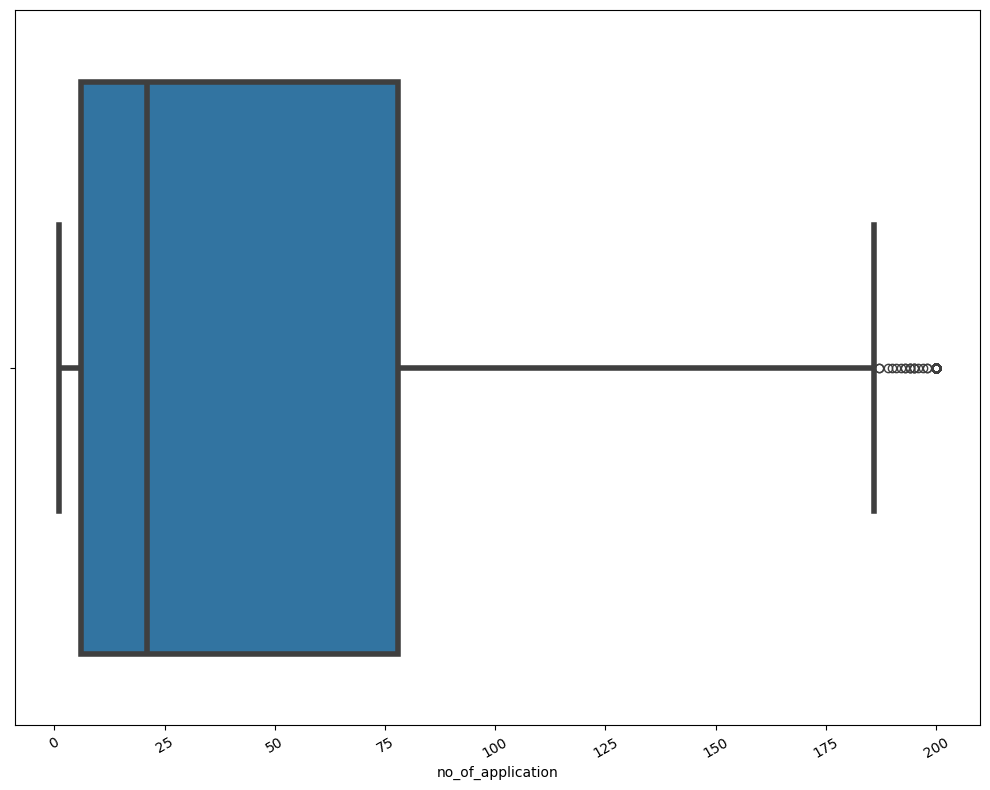

In [ ]:
#Membuat boxplot untuk mengidentifikasi outliers
#1. Membuat sizenya secara manual dengan figsize
#2. Menebalkan garis boxplot dengan membuat linewidth = 4
#3. Menggunakan tight_layout dan membuat nilai di sumbu x rotasi 30 derajat supaya dapat terlihat di visualisasi

plt.figure(figsize=(10,8))
sns.boxplot(
    data=df,
    x="no_of_application",
    linewidth=4
)

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
q1 = df["no_of_application"].quantile(0.25)
q3 = df["no_of_application"].quantile(0.75)
IQR = q3 - q1
bottom = q1 - 1.5*IQR
upper  = q3 + 1.5*IQR

condition = (df["no_of_application"]>bottom) & (df["no_of_application"]<upper)

df[condition]
print(f"Batas bawah {bottom}")
print(f"Batas atas {upper}")

Batas bawah -102.0
Batas atas 186.0


In [ ]:
df[df["no_of_application"]>upper]["no_of_application"].count()

321

In [ ]:
df[df["no_of_application"]<bottom]["no_of_application"].count()

0

**Analisis**

1. interkuartil (IQR) - 50% tengah data cukup luas, artinya ada sebaran data yang signifikan.Letak garis median lebih dekat ke kuartil bawah, sehingga distribusinya tidak seimbang.

2. Garis ini memanjang untuk menunjukkan kisaran dalam 1,5 kali IQR. Panjang garis kiri lebih pendek dari panjang garis kanan, sehingga distribusi data memiliki kemiringan ke kanan (right skewed).

3. Lingkaran kecil adalah outlier di luar garis batas, yang menunjukkan nilai yang jauh lebih tinggi.

4. Kolom no_of_application memiliki batas bawah -102.0 dan batas atas 186.0

5. Ada 321 data yang melebihi batas atas dan 0 data yang kurang dari batas bawah, sehingga ada 321 outliers
